In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
# Load CSV file into a DataFrame
df = pd.read_csv('data/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [11]:
df.drop('Name', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [13]:
df.isna().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [14]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


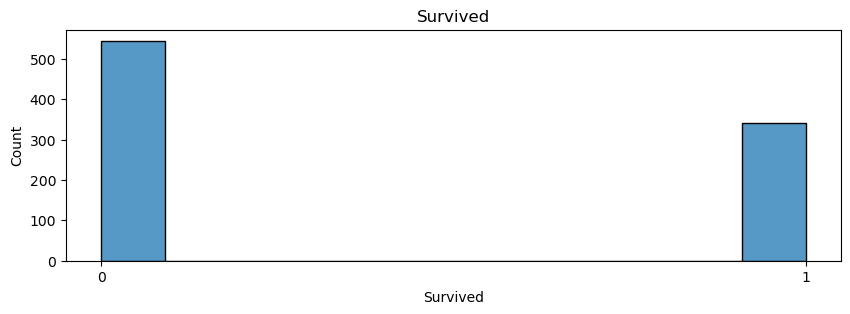

In [15]:
plt.figure(figsize=(10, 3))
sns.histplot(df['Survived'], kde=False)
plt.title('Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])
plt.show()

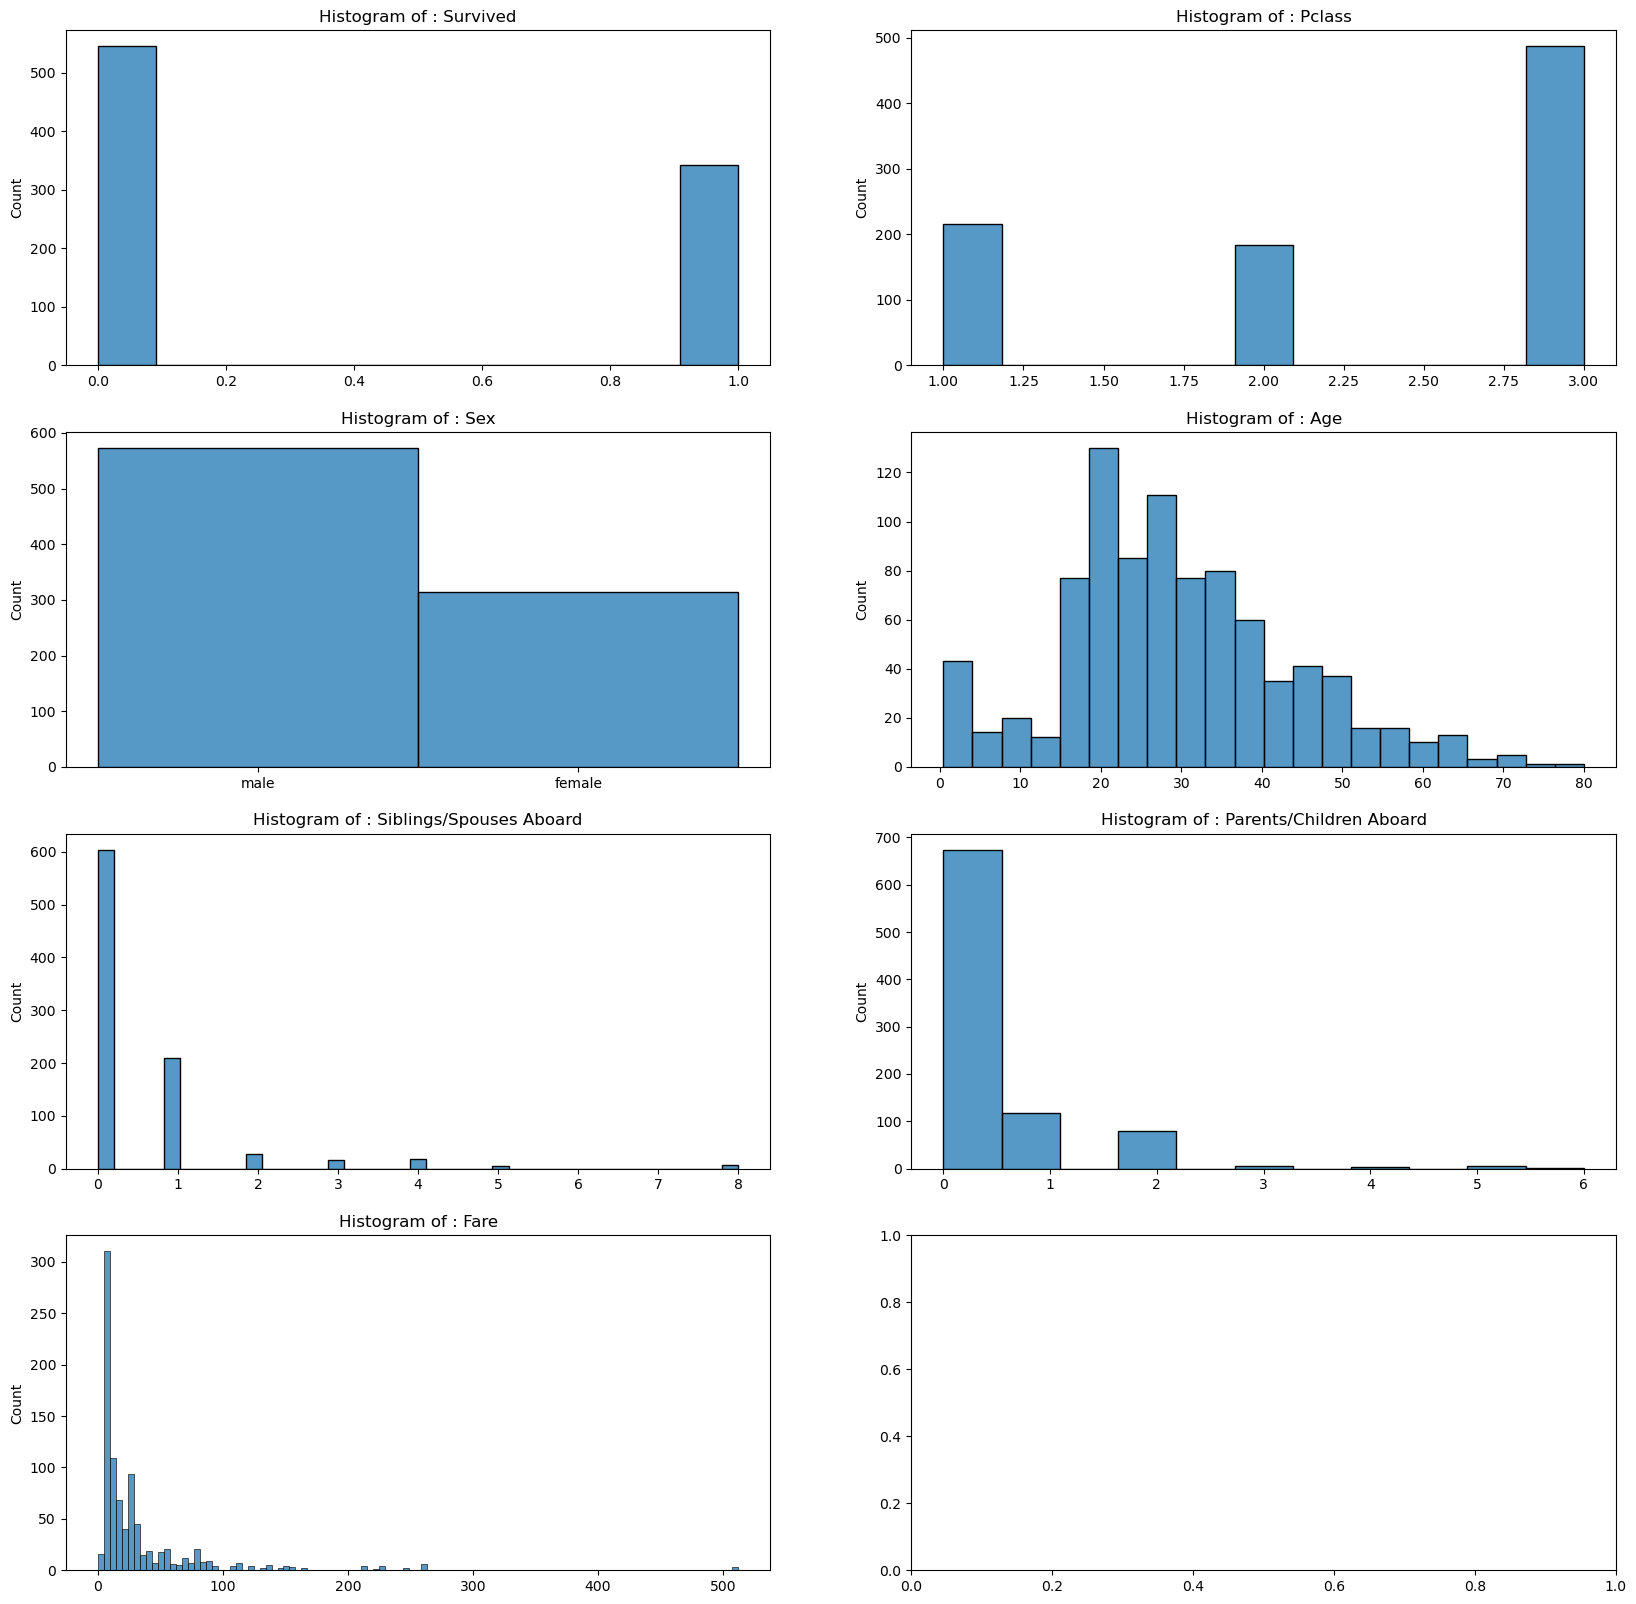

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
for i, ax in zip(df.columns, axes.flat):
    sns.histplot(x=df[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [18]:
# Assuming df is your DataFrame
df_without_sex = df.drop('Sex', axis=1)  # Drop the 'Sex' column

# Calculate the correlation matrix using Spearman method
corr = df_without_sex.corr(method='spearman')

# Display the correlation matrix
print(corr)


                         Survived    Pclass       Age  \
Survived                 1.000000 -0.337648 -0.030265   
Pclass                  -0.337648  1.000000 -0.387982   
Age                     -0.030265 -0.387982  1.000000   
Siblings/Spouses Aboard  0.086571 -0.040348 -0.199269   
Parents/Children Aboard  0.136530 -0.020617 -0.254234   
Fare                     0.322264 -0.688234  0.156062   

                         Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived                                0.086571                 0.136530   
Pclass                                 -0.040348                -0.020617   
Age                                    -0.199269                -0.254234   
Siblings/Spouses Aboard                 1.000000                 0.449198   
Parents/Children Aboard                 0.449198                 1.000000   
Fare                                    0.445980                 0.409202   

                             Fare  
Survived                

In [19]:
# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display train and test data
df_train, df_test, y_train, y_test = train_test_split(df, df['Survived'], test_size=0.2, random_state=123)

print("\nTRAIN:")
display(df_train.head())
print("SHAPE:", df_train.shape)

print("\nTEST:")
display(df_test.head())
print("SHAPE:", df_test.shape)


TRAIN:


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
833,0,3,male,20.0,0,0,8.0500
97,1,2,female,34.0,0,1,23.0000
711,0,2,male,52.0,0,0,13.0000
43,1,3,female,19.0,0,0,7.8792
585,0,3,male,22.0,0,0,8.0500


SHAPE: (709, 7)

TEST:


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
580,0,1,male,36.0,0,0,40.1250
814,0,3,male,43.0,0,0,6.4500
147,0,2,male,36.5,0,2,26.0000
134,0,2,male,23.0,0,0,15.0458
633,0,3,male,32.0,0,0,7.9250


SHAPE: (178, 7)


In [20]:
df_train.info()
df_train.isna().sum()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 833 to 510
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 709 non-null    int64  
 1   Pclass                   709 non-null    int64  
 2   Sex                      709 non-null    object 
 3   Age                      709 non-null    float64
 4   Siblings/Spouses Aboard  709 non-null    int64  
 5   Parents/Children Aboard  709 non-null    int64  
 6   Fare                     709 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.3+ KB


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,0.377997,2.301834,29.915247,0.559944,0.389281,33.890884
std,0.485229,0.843225,14.173187,1.184112,0.823866,52.599894
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,32.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


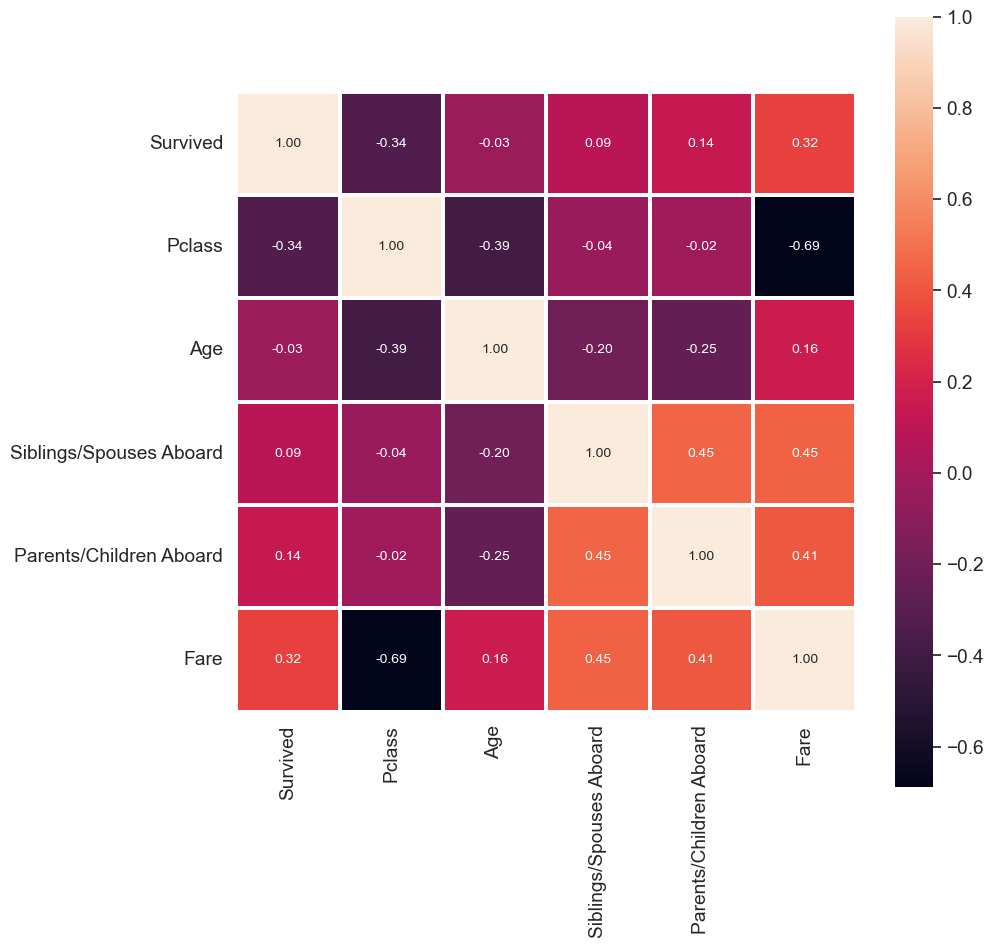

In [21]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}
)
plt.show()

In [22]:
df_train.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
833,0,3,male,20.0,0,0,8.0500
97,1,2,female,34.0,0,1,23.0000
711,0,2,male,52.0,0,0,13.0000
43,1,3,female,19.0,0,0,7.8792
585,0,3,male,22.0,0,0,8.0500


In [23]:
y = df_train["Survived"].values
print(y.shape)

(709,)


In [24]:
y = df_train["Survived"].values

In [25]:
print(y.shape)

(709,)


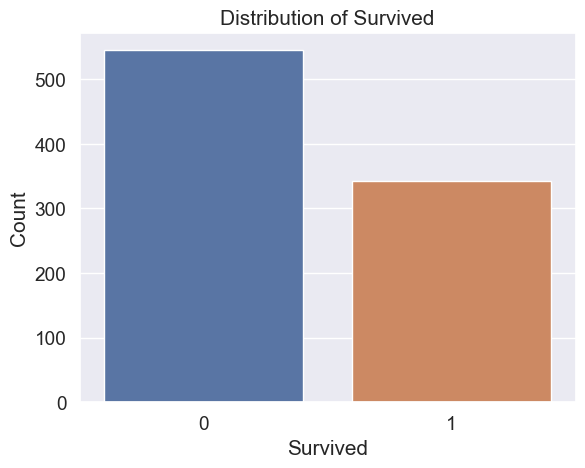

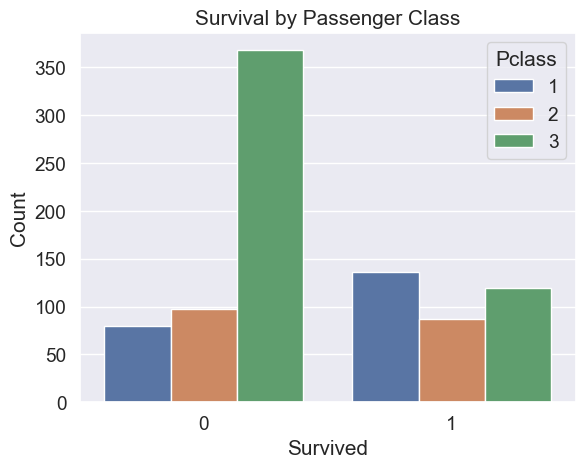

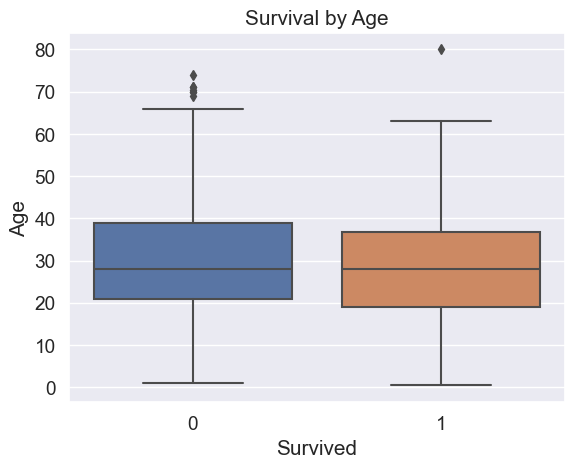

In [26]:
# Visualize the distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived')
plt.show()

# Explore relationships between features and the target variable
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Passenger Class')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Survival by Age')
plt.show()

In [27]:
from scipy.stats import chi2_contingency

# Chi-squared test for Sex vs. Survived
sex_survived_contingency = pd.crosstab(df['Sex'], df['Survived'])
chi2_stat, p_val, dof, expected = chi2_contingency(sex_survived_contingency)
print("Chi-squared p-value for Sex vs. Survived:", p_val)

# Chi-squared test for Pclass vs. Survived
pclass_survived_contingency = pd.crosstab(df['Pclass'], df['Survived'])
chi2_stat, p_val, dof, expected = chi2_contingency(pclass_survived_contingency)
print("Chi-squared p-value for Pclass vs. Survived:", p_val)


Chi-squared p-value for Sex vs. Survived: 3.847574039733745e-58
Chi-squared p-value for Pclass vs. Survived: 1.0496962042983216e-22


In [28]:
from scipy.stats import f_oneway

# Conduct ANOVA for Age and Pclass
anova_results = f_oneway(
    df_train[df_train['Pclass'] == 1]['Survived'].dropna(),
    df_train[df_train['Pclass'] == 2]['Survived'].dropna(),
    df_train[df_train['Pclass'] == 3]['Survived'].dropna()
)

print("ANOVA p-value for Survival and Pclass:", anova_results.pvalue)


ANOVA p-value for Survival and Pclass: 2.555427249250279e-19


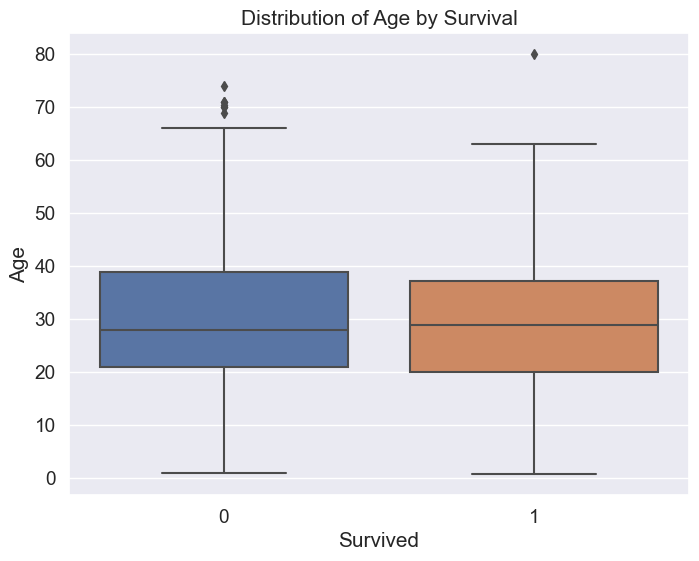

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Distribution of Age by Survival')
plt.show()


In [34]:
df_train.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,0.377997,2.301834,29.915247,0.559944,0.389281,33.890884
std,0.485229,0.843225,14.173187,1.184112,0.823866,52.599894
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,32.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df_train.tail()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
98,0,2,male,34.0,1,0,26.0000
322,0,3,male,20.0,8,2,69.5500
382,0,3,male,27.0,0,0,7.8958
365,1,3,female,35.0,0,0,7.2292
510,1,1,female,54.0,1,0,59.4000


In [42]:
from sklearn.preprocessing import CategoricalEncoder
import category_encoders as ce

# Example 1: Target Encoding
encoder_target = ce.TargetEncoder(cols=['Pclass', 'Sex'])  # Replace with your actual categorical column
X_train_encoded_target = encoder_target.fit_transform(X_train, y_train)
X_test_encoded_target = encoder_target.transform(X_test)

# Example 2: CatBoost Encoding
encoder_catboost = ce.CatBoostEncoder(cols=['Pclass', 'Sex'])  # Replace with your actual categorical column
X_train_encoded_catboost = encoder_catboost.fit_transform(X_train, y_train)
X_test_encoded_catboost = encoder_catboost.transform(X_test)

# Example 3: Binary Encoding
encoder_binary = ce.BinaryEncoder(cols=['Pclass', 'Sex'])  # Replace with your actual categorical column
X_train_encoded_binary = encoder_binary.fit_transform(X_train, y_train)
X_test_encoded_binary = encoder_binary.transform(X_test)

ImportError: cannot import name 'CategoricalEncoder' from 'sklearn.preprocessing' (c:\Users\Me\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)